In [2]:
pip install tensorflow


  Using cached tensorflow-2.14.0-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.14.0-cp39-cp39-win_amd64.whl (284.1 MB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl (440 kB)
  Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl (938 kB)
  Using cached tensorboard-2.14.1-py3-none-any.whl (5.5 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached grpcio-1.58.0-cp39-cp39-win_amd64.whl 

C:\Users\jose\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2969 - accuracy: 0.9132 - val_loss: 0.1390 - val_accuracy: 0.9607
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1410 - accuracy: 0.9576 - val_loss: 0.1028 - val_accuracy: 0.9724
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1078 - accuracy: 0.9674 - val_loss: 0.0795 - val_accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0882 - accuracy: 0.9721 - val_loss: 0.0824 - val_accuracy: 0.9745
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0736 - accuracy: 0.9765 - val_loss: 0.0690 - val_accuracy: 0.9789
313/313 - 1s - loss: 0.0690 - accuracy: 0.9789 - 524ms/epoch - 2ms/step

Test accuracy: 0.9789000153541565


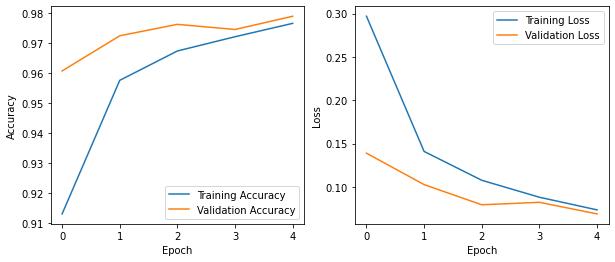

In [3]:
# Import TensorFlow
import tensorflow as tf

# Import other necessary libraries
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a simple neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),     # Flatten the 28x28 images into a 1D array
    layers.Dense(128, activation='relu'),     # Fully connected layer with 128 units and ReLU activation
    layers.Dropout(0.2),                      # Dropout layer to reduce overfitting
    layers.Dense(10)                          # Output layer with 10 units (one for each digit)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Plot the training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
